<a href="https://colab.research.google.com/github/Yuanyun936/AI-ML-for-global-health/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1 - Screening Baseline Machine Learning Techniques
The objective of this lab is to understand the fundamentals of basic machine learning before approaching custom built deep learning architectures

#### Project Info

 ->Copyright 2024 Luis R Soenksen

 ->Last Update: March 24, 2024

```
**Licensed under the Apache License, Version 2.0**
You may not use this file except in compliance with the License. You may obtain a copy of the License at
https://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.
```

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Compatible with Google Colab</a>      
    </td>
  <td>
    <a target="_blank" href="https://github.com/lrsoenksen/"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Visit my GitHub</a>
  </td>
</table>

------------------------------------------------------

#### Step 0) Setup system and import required packages

In [3]:
# Installs deeded not already included in Google Colab
!pip install opendatasets --upgrade --quiet
!pip3 install lazypredict ## You will need to install lazypredict first time you try to use the package in a new instance

In [4]:
# Import packages
import os
import numpy as np
import pandas as pd
import opendatasets as od
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # for Random Forest Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#### Step 1) Load data

**Rural Maternal Health Risk Dataset to predict health risks in pregnant patients**

The following dataset has been collected from different hospitals, community clinics, maternal health cares through the use of portable risk monitoring devices.

Inputs:
*   Age: This refers to a woman's age in years during pregnancy.
*   SystolicBP: This is the higher blood pressure reading, measured in mmHg, and is an important indicator during pregnancy.
*   DiastolicBP: This is the lower blood pressure reading, also measured in mmHg, and is crucial during pregnancy.
*   BS: This indicates blood glucose levels, expressed in mmol/L.
*   HeartRate: This is the typical resting heart rate, counted in beats per minute.

Outputs:
*   Risk Level: This denotes the predicted intensity of risk during pregnancy based on the above attributes.



References:

1.   Ahmed, M., Kashem, M.A., Rahman, M. and Khatun, S., 2020. Review and analysis of risk factor of maternal health in remote area using the Internet of Things (IoT). In InECCE2019: Proceedings of the 5th International Conference on Electrical, Control & Computer Engineering, Kuantan, Pahang, Malaysia, 29th July 2019 (pp. 357-365). Springer Singapore.

2.   Ahmed, M. and Kashem, M.A., 2020, December. IoT based risk level prediction model for maternal health care in the context of Bangladesh. In 2020 2nd International Conference on Sustainable Technologies for Industry 4.0 (STI) (pp. 1-6). IEEE.



In [5]:
# Make sure you have a kaggle account and an API Key
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data'
# Using opendatasets let's download the data sets
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Yuanyun Hu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data


100%|██████████| 3.77k/3.77k [00:00<00:00, 8.23MB/s]

In [6]:
# Define the path to the dataset folder
dataset_folder_path = "/content/maternal-health-risk-data"

# Load CSV file to pandas from path
# Change the path to the CSV file if you have it your Google Drive
csv_path = dataset_folder_path + "/Maternal Health Risk Data Set.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Print the DataFrame
print(df)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80 15.00     98.00         86  high risk
1      35         140           90 13.00     98.00         70  high risk
2      29          90           70  8.00    100.00         80  high risk
3      30         140           85  7.00     98.00         70  high risk
4      35         120           60  6.10     98.00         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60 15.00     98.00         80  high risk
1010   55         120           90 18.00     98.00         60  high risk
1011   35          85           60 19.00     98.00         86  high risk
1012   43         120           90 18.00     98.00         70  high risk
1013   32         120           65  6.00    101.00         76   mid risk

[1014 rows x 7 columns]


------------------------------------------------------

#### Step 2) Screen over various baseline machine learning models with Lazypredict
**Lazy Predict** is designed to make life easier for data scientists and machine learning enthusiasts. It automates the tedious task of model fitting and comparison, allowing you to quickly assess a wide range of models with minimal code. Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning across classification and regression problems.

*   For **classification** Lazypredict includes:

      LinearSVC, SGDClassifier, MLPClassifier, Perceptron, LogisticRegression, LogisticRegressionCV, SVC, CalibratedClassifierCV, PassiveAggressiveClassifier, LabelPropagation, LabelSpreading, RandomForestClassifier, etc. See Documentation here https://lazypredict.readthedocs.io.

*   For **regression** Lazypredict includes:

      SVR, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, NuSVR, GradientBoostingRegressor, KNeighborsRegressor, SGDRegressor, etc. See Documentation here https://lazypredict.readthedocs.io.

In [ ]:
'''
Fill the in the missing code marked as # TO DO
'''

In [7]:
# Load the dataset, split into input (X) and output (y) variables
X = df.drop('RiskLevel',axis=1) # TO DO
y = df['RiskLevel']# TO DO

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)# TO DO

In [11]:
# Display dictionary of Input dataframe
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1014.00,29.87,13.47,10.00,19.00,26.00,39.00,70.00
SystolicBP,1014.00,113.20,18.40,70.00,100.00,120.00,120.00,160.00
DiastolicBP,1014.00,76.46,13.89,49.00,65.00,80.00,90.00,100.00
BS,1014.00,8.73,3.29,6.00,6.90,7.50,8.00,19.00
BodyTemp,1014.00,98.67,1.37,98.00,98.00,98.00,98.00,103.00
HeartRate,1014.00,74.30,8.09,7.00,70.00,76.00,80.00,90.00


In [12]:
# Display dictionary of Output dataframe
y.describe().transpose()

,RiskLevel
count,1014
unique,3
top,low risk
freq,406


In [13]:
# Initialize LazyClassifier and fit
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)# TO DO

# Models is a pandas DataFrame of model performance metrics
print(models)

 93%|█████████▎| 27/29 [00:03<00:00,  9.13it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 811, number of used features: 6
[LightGBM] [Info] Start training from score -1.282168
[LightGBM] [Info] Start training from score -0.911371
[LightGBM] [Info] Start training from score -1.137586
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

100%|██████████| 29/29 [00:03<00:00,  8.15it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.84               0.85    None      0.84   
ExtraTreeClassifier                0.82               0.82    None      0.82   
DecisionTreeClassifier             0.82               0.82    None      0.82   
BaggingClassifier                  0.82               0.82    None      0.82   
ExtraTreesClassifier               0.81               0.82    None      0.81   
RandomForestClassifier             0.81               0.81    None      0.81   
LabelPropagation                   0.77               0.79    None      0.77   
LabelSpreading                     0.77               0.78    None      0.77   
SVC                                0.68               0.70    None      0.66   
NuSVC                              0.67               0.69    None      0.66   
AdaBoostClassifier                 0.69 

In [14]:
# Create a Random Forest classifier with 100 trees
model = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
# TO DO
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)# TO DO

# Evaluate model accuracy
accuracy = accuracy_score(y_test,y_pred)# TO DO
print("Accuracy:", accuracy)

Accuracy: 0.812807881773399


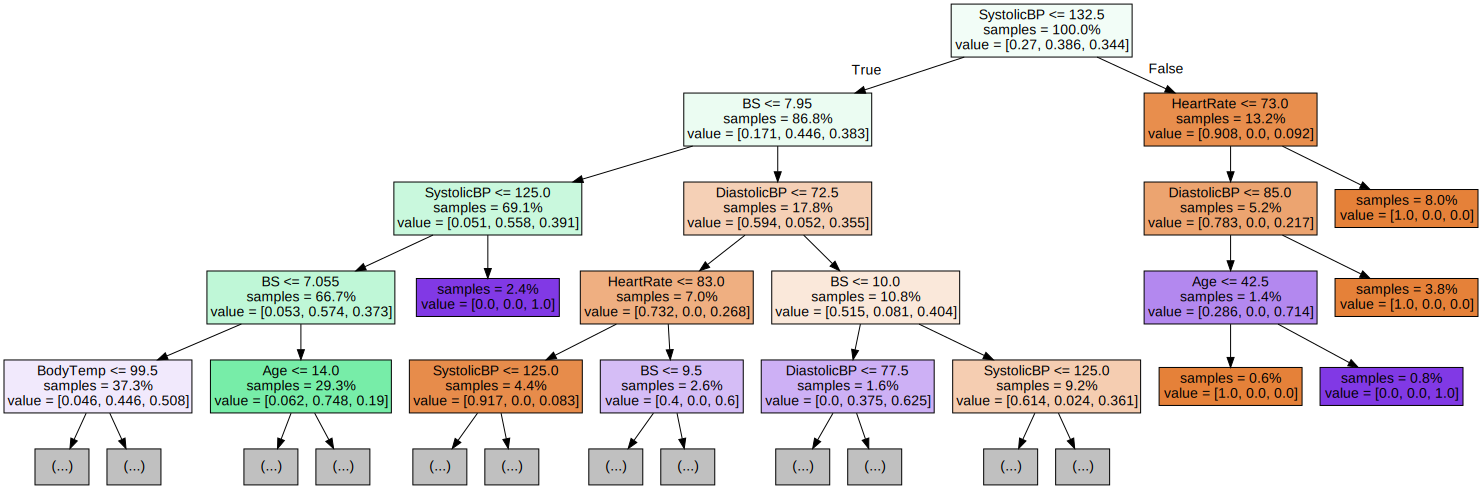

In [15]:
# Tree Visualisation
# Export the first n decision trees from the forest
n=1 # Change this variable to visualize more trees

# Plot trees
for i in range(n):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=4,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

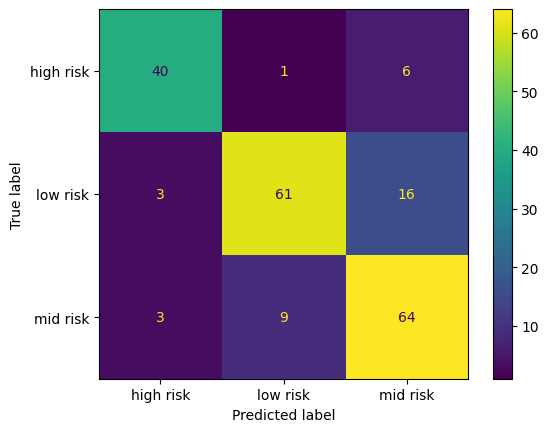

In [16]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot();

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.812807881773399
Precision: 0.8185226557560207
Recall: 0.812807881773399


------------------------------------------------------
------------------------------------------------------